In [3]:
library(cacoa)
library(Seurat)
library(magrittr)
library(cowplot)
library(ggplot2)
options(repr.plot.width=12, repr.plot.height=10, 
        jupyter.plot_scale = 1,repr.plot.res = 100)
Sys.setenv(https_proxy='http://www-int.dkfz-heidelberg.de:80')
Sys.setenv(http_proxy='http://www-int.dkfz-heidelberg.de:80')
if (exists("snakemake")) {
    cao_input <- snakemake@input[["cacoa_processed"]]
    repermute <- snakemake@params[["permute"]] 
    threads <- snakemake@threads
} else {
    cao_input <- "/omics/odcf/analysis/OE0228_projects/VascularAging/rna_sequencing/public_scrnaseq/adams_et_al/processed_cao.RDS.gz"
    #cao_input <-  file.path(base_fp, "processed_cao.RDS.gz")
    repermute <- F
}

# CACOA Analysis of Public Single Cell Datasets

Using the Cacoa Package we analyze the structure of single cell datasets with 
the goal of identifying group specific changes in the data. 

In [2]:
cao_obj <- readRDS(cao_input)

In [3]:

#for(de_n in list("de.Wald", "deFixed_LRT", "de.fix", "de.loo")) {
 #   cao_obj <- estimateAllStabs(de_n = de_n, cao_obj = cao_obj)
#} 

In [4]:
example.celltypes <- names(sort(table(cao_obj$cell.groups),decreasing=T))
top1 <- example.celltypes[1] 
top2 <- example.celltypes[c(1,2)]

cells.to.contour <- top2
cell.to.go <- example.celltypes[3]

alpha <- 0.1; size <- 0.1;

## Overview of dataset

UMAP visualization of the dataset stratified by age and by cell types

Classifcaiton into old and young samples is done on a dataset by dataset basis


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




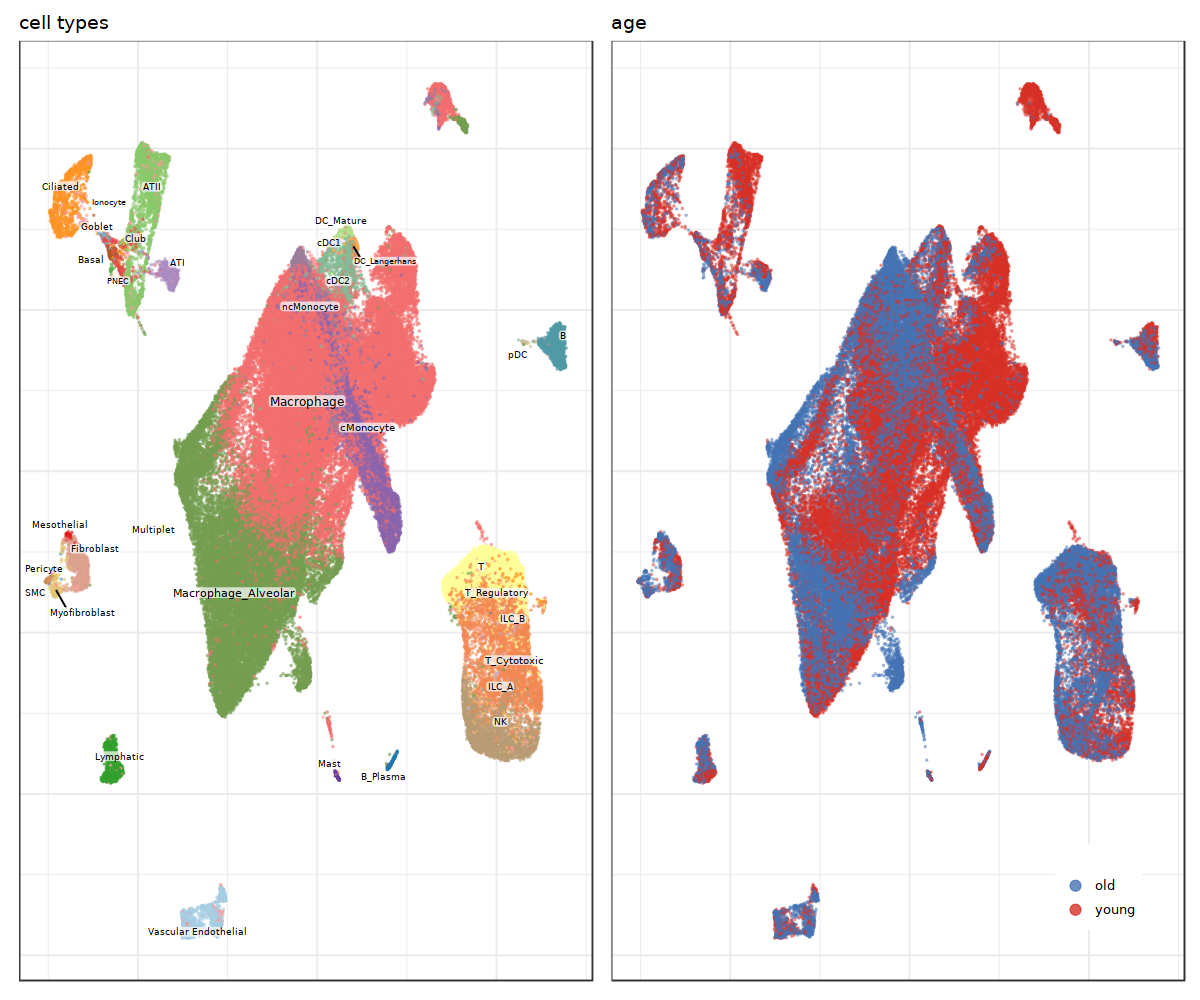

In [6]:
library(ggplot2)
library(patchwork)
size = 0.1
alpha = 0.5
cao_obj$plotEmbedding(color.by='cell.groups', alpha=alpha, size=size, title='cell types', 
                    plot.na=FALSE, show.legend=FALSE, font.size=c(2,3)) |
cao_obj$plotEmbedding(color.by='condition', alpha=0.4, size=0.1, title='age', mark.groups = F) +    theme(legend.position=c(0.85, 0.1)) +
    guides(color=guide_legend(override.aes = list(size=3,alpha=0.8),title='')) 

In [6]:
names(cao_obj$data.object@graphs)
gc()

#cao_obj$estimateExpressionShiftMagnitudes(dist = "cor", top.n.genes = 1500, n.pcs = NULL)

[1] "SCT_nn"  "SCT_snn"

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,6008537,320.9,11326524,605.0,8504252,454.2
Vcells,3312895672,25275.4,4496427986,34305.1,3361788940,25648.5


Filtering data... 

Excluding cell types Basal, Goblet, Mesothelial, SMC, DC_Langerhans, Mast, pDC, Pericyte, PNEC, Ionocyte that don't have enough samples




done!
Calculating pairwise distances using dist='cor'...


ERROR: Error in mcfork(): unable to fork, possible reason: Cannot allocate memory


## Expresssion Shift Magnitudes

We can use Expression shift magnitudes to infer Intra- and Intercluster differences on the basis of Correlation distances between cells

The exact mechanisms are unclear. 



In [9]:
cao_obj$plotExpressionDistance(joint=TRUE, notch=TRUE, show.significance=TRUE)

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

The following plot whos the Expression distance between groups and tests their significance

In [8]:
cao_obj$plotExpressionDistance(show.significance=TRUE)

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

The Expression distance embedding is a dimensionality reduction on the Correlation distance
between samples showing how samples/batches are related with each other. 

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.

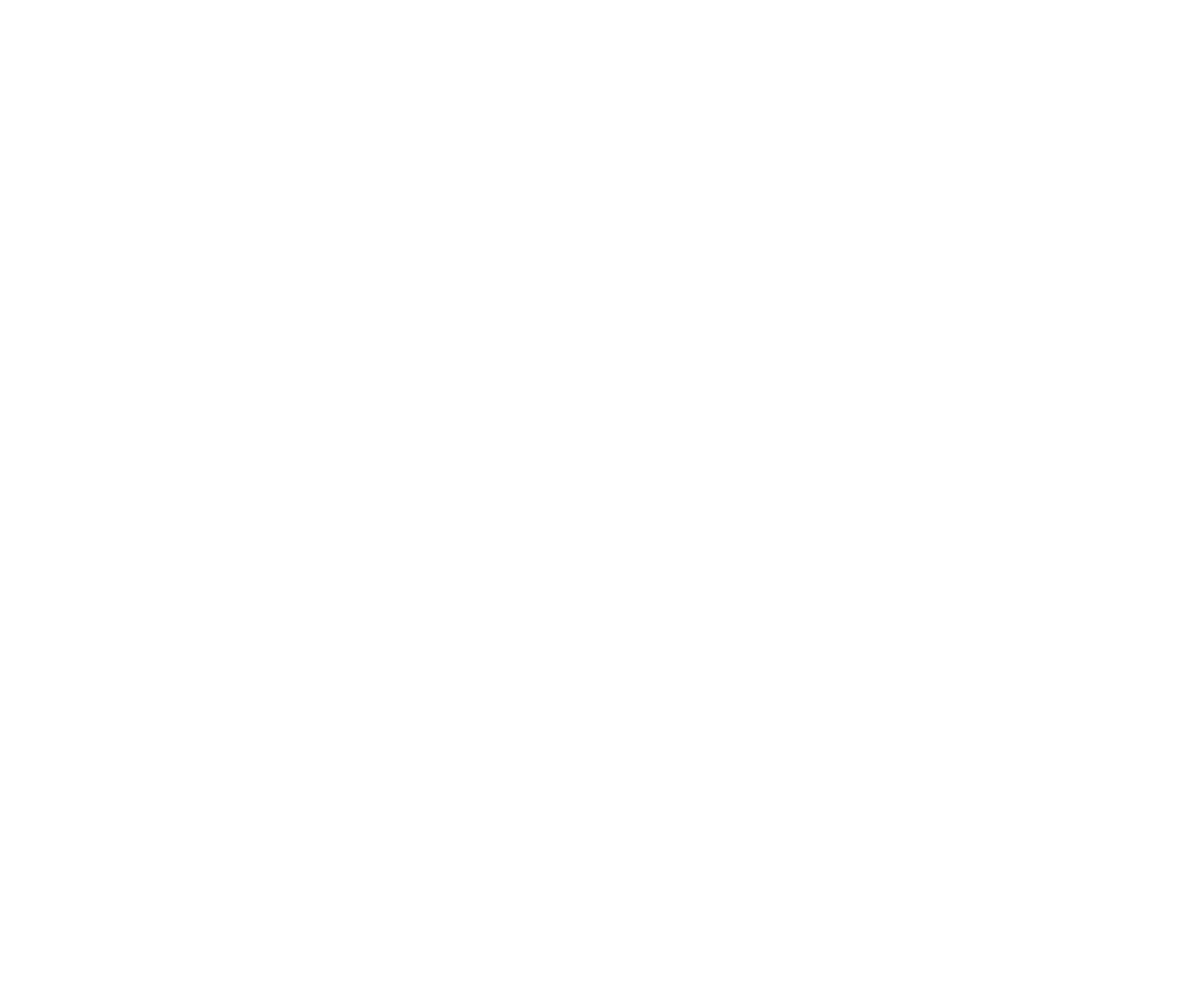

In [10]:
cao_obj$plotExpressionDistanceEmbedding(method='MDS', font.size=2,  )

### Shift types

The first plot here shows the ExpressionshiftMagnitude for "normal" expression shifts

The bottom plot shows this for "common" expression shifts. Difference between these two types is unknown. 


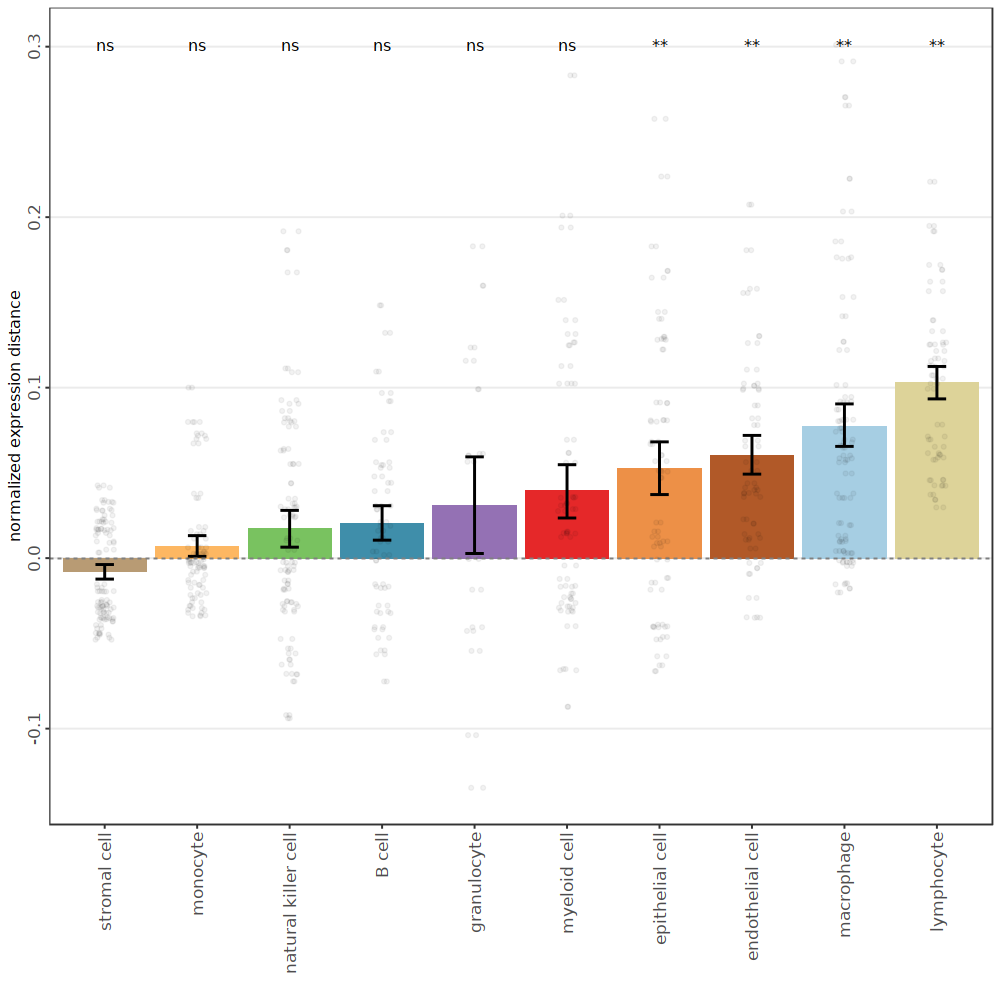

In [10]:
cao_obj$plotExpressionShiftMagnitudes(type='bar',show.pvalues = "adjusted",shift.type = "normal")

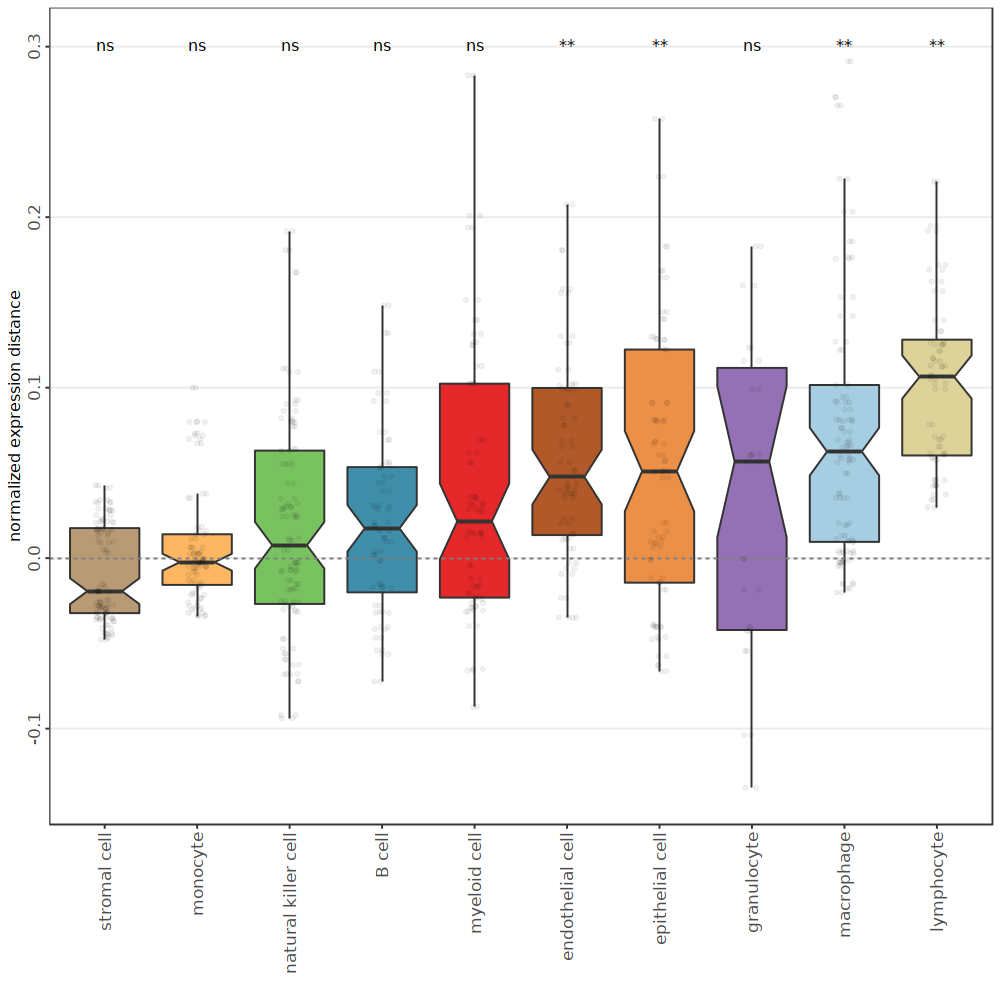

In [11]:
cao_obj$plotExpressionShiftMagnitudes()

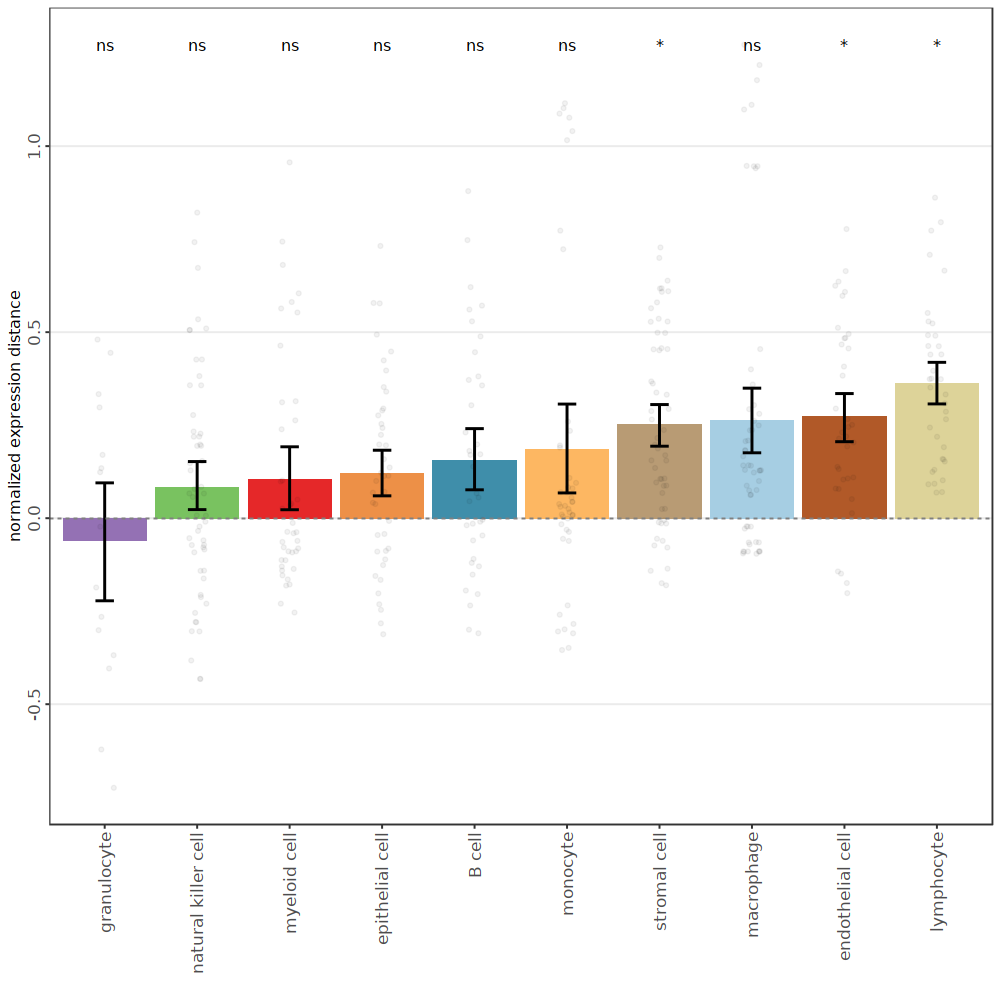

In [12]:
cao_obj$plotExpressionShiftMagnitudes(shift.type = "common", 
                                        show.jitter=TRUE, type='bar')

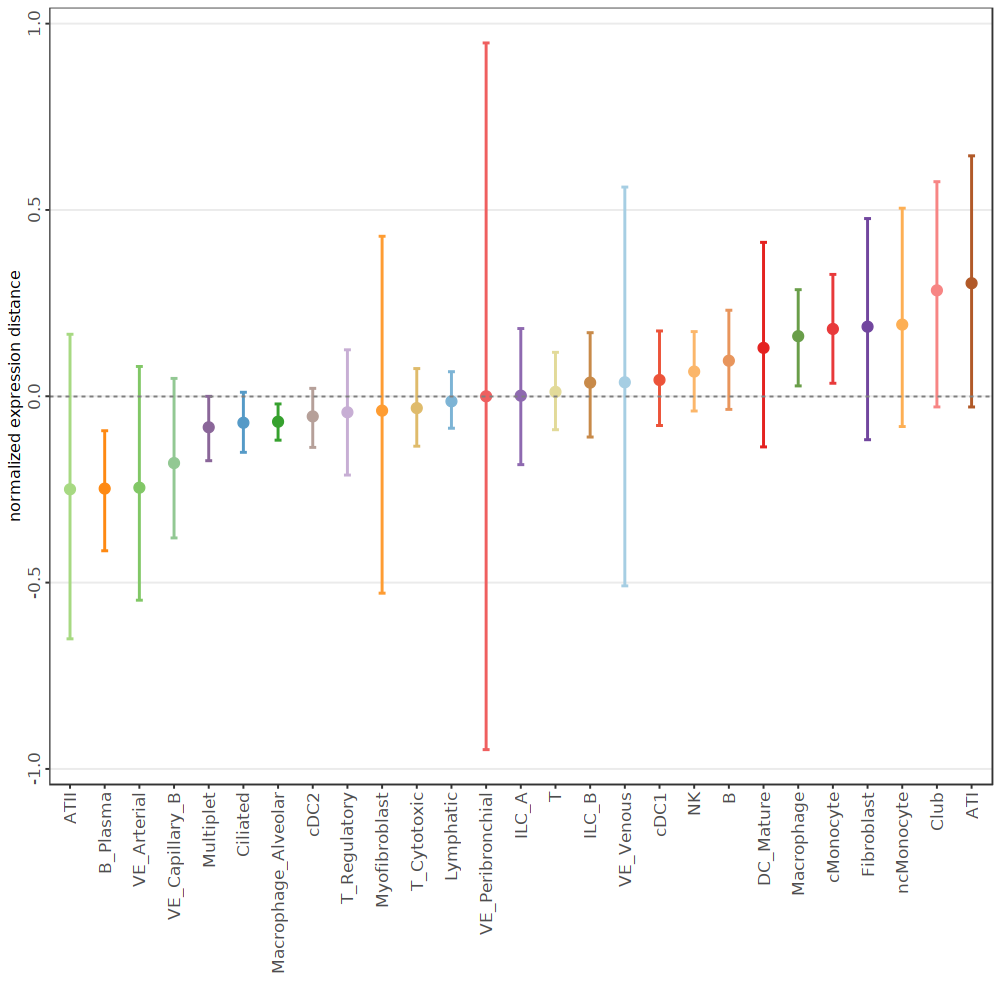

In [31]:
cao_obj$plotExpressionShiftMagnitudes( show.jitter=FALSE, type='point', shift.type = "common")

## Cell Group Proportions between groups

Cell types {Ionocyte} are present only in young samples



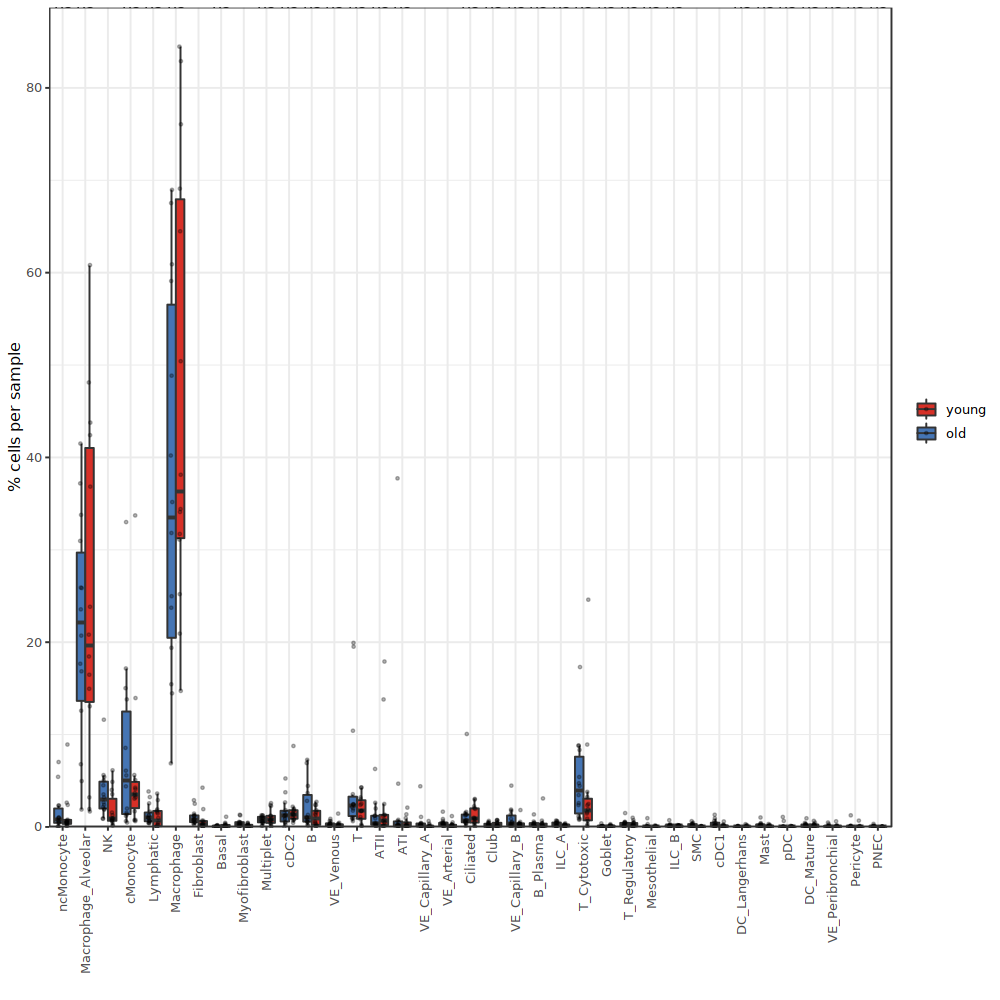

In [32]:
cao_obj$plotCellGroupSizes(alpha=0.3, show.significance=TRUE)

This plot shows PCA? Cell loadings to the best contrast? No Idea what this actually means but its pretty

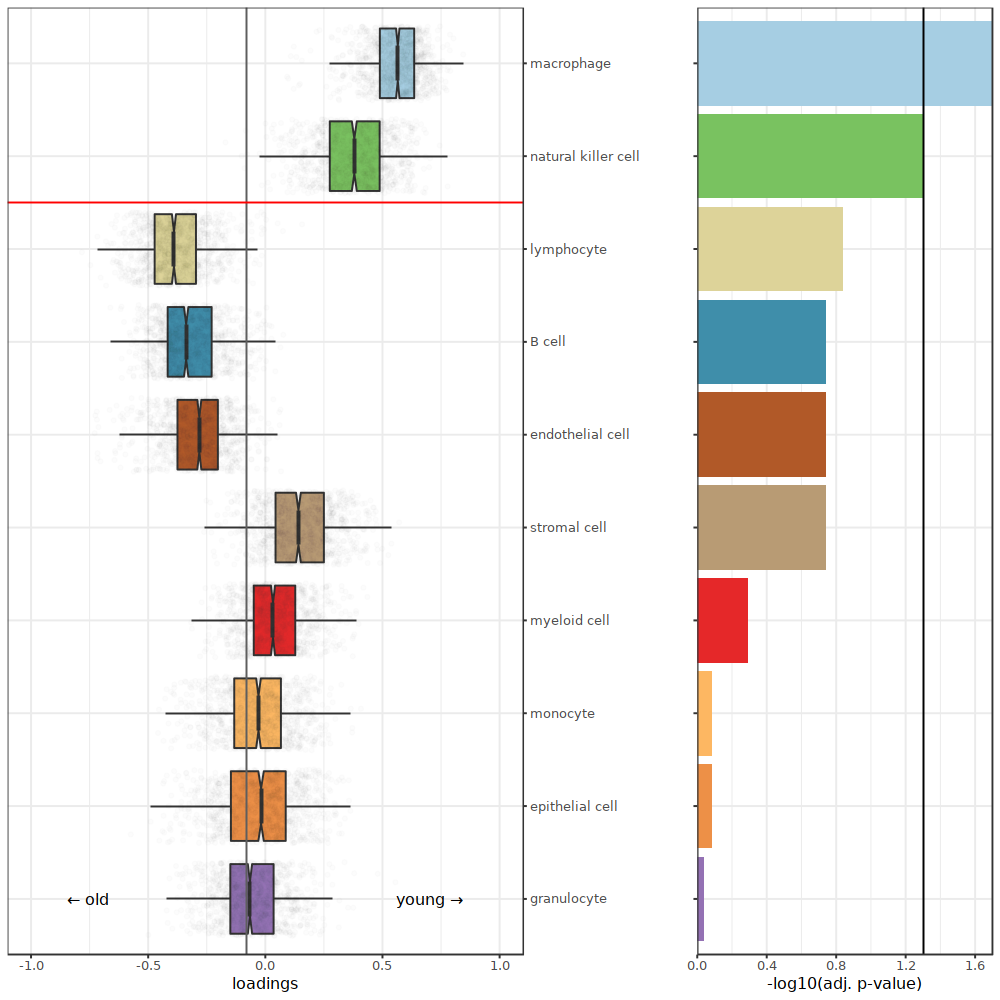

In [13]:
signif.threshold <- 0.05
cao_obj$plotCellLoadings(signif.threshold=signif.threshold, show.pvals=TRUE, alpha=0.01)

## CODA space

Sadly we dont know what CODA space is (some type of Dimensionality Reduction). The first plot is ont he basis of PCA and somehow infers cluster Positions across this PCA (But I can't really tell what and why)

The second plot uses significant cells from cda and does the same plot. Again no idea whwat when how and why. 


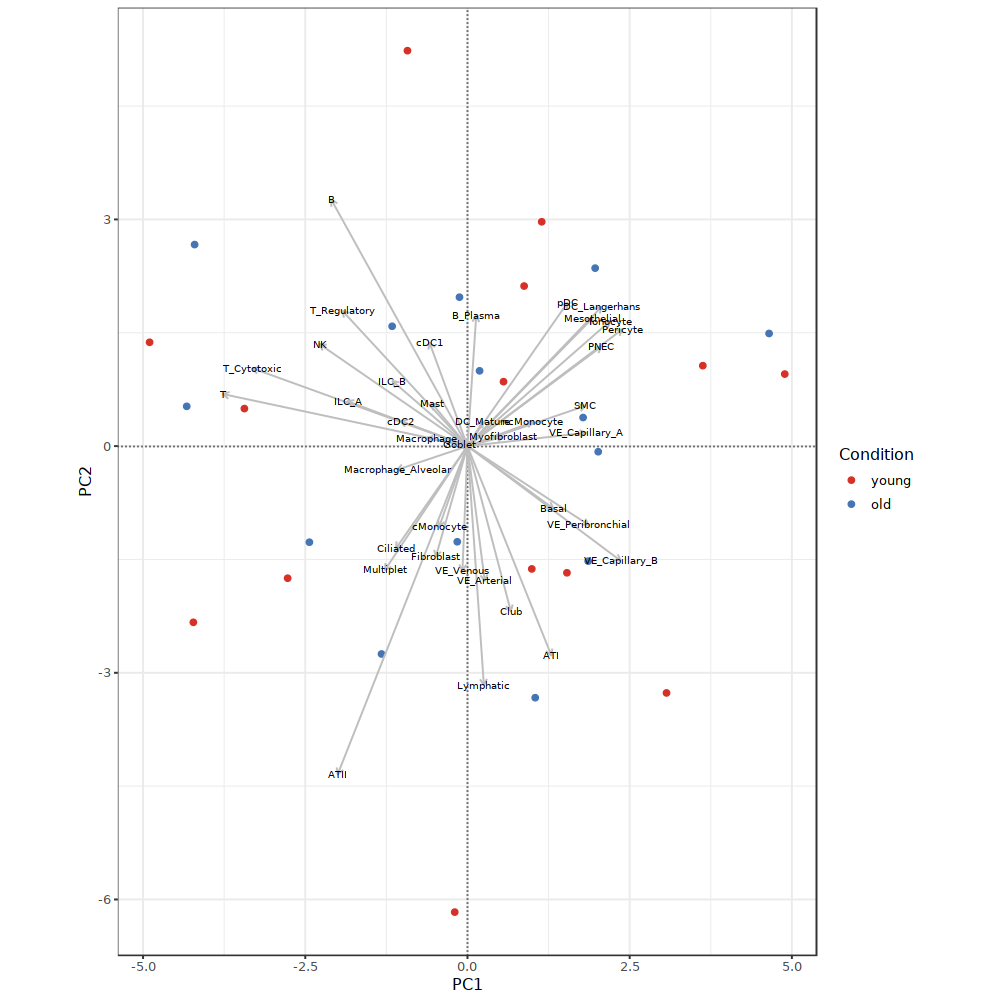

In [34]:

cao_obj$plotCodaSpace(space='PCA', font.size=2.5) 

In [ ]:
cells.signif <- names(cao_obj$test.results$cda$pvals)[cao_obj$test.results$cda$pvals < signif.threshold]

In [ ]:
if(length(cells.signif) >= 2) {
 cao_obj$plotCodaSpace(space='CDA', cells.to.remain = cells.signif)
} else {
  cao_obj$plotCodaSpace(space='CDA')
}

In [ ]:
cao_obj$plotContrastTree()

In [ ]:
library(ggplot2)


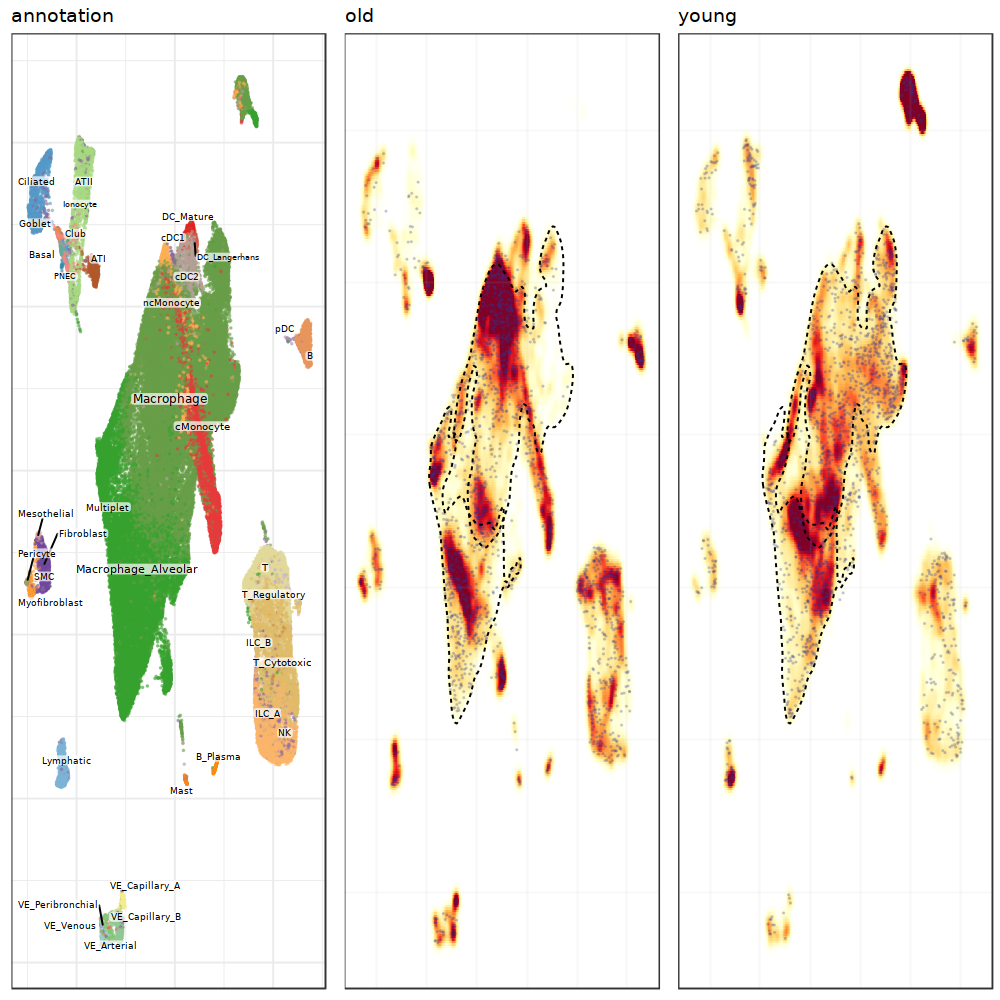

In [35]:

p0 <- cao_obj$plotEmbedding(color.by='cell.groups', alpha=alpha, size=size,
                        title='annotation', show.legend=FALSE, font.size=c(2,3))
pl <- cao_obj$plotCellDensity(add.points=TRUE, show.grid=TRUE, contours=cells.to.contour,
                          show.cell.groups=FALSE)
plot_grid(p0, plotlist=pl, nrow = 1)

Differential celld ensity calculates cluster free changes in density among the cells in the
UMAP plot, showing where cells are closely grouped in the plot

In [ ]:
#cao_obj$estimateDiffCellDensity(type='permutation', verbose=FALSE)
p1 <- cao_obj$plotDiffCellDensity(type='permutation', title='difference',
                              legend.position=c(0,0), contours=cells.to.contour)
#p2 <- cao_obj$plotDiffCellDensity(type='t.test', title='t.test',
     #                         legend.position=c(0,0), contours=cells.to.contour)
#p3 <- cao_obj$plotDiffCellDensity(type='wilcox', title='wilcox',
 #                             legend.position=c(0,0), contours=cells.to.contour)
#p4 <- cao_obj$plotDiffCellDensity(type='permutation', title='permutation',
 #                             legend.position=c(0,0), contours=cells.to.contour)

In [ ]:
plot_grid(p0,p1)

Cell density estimated on a graph based method

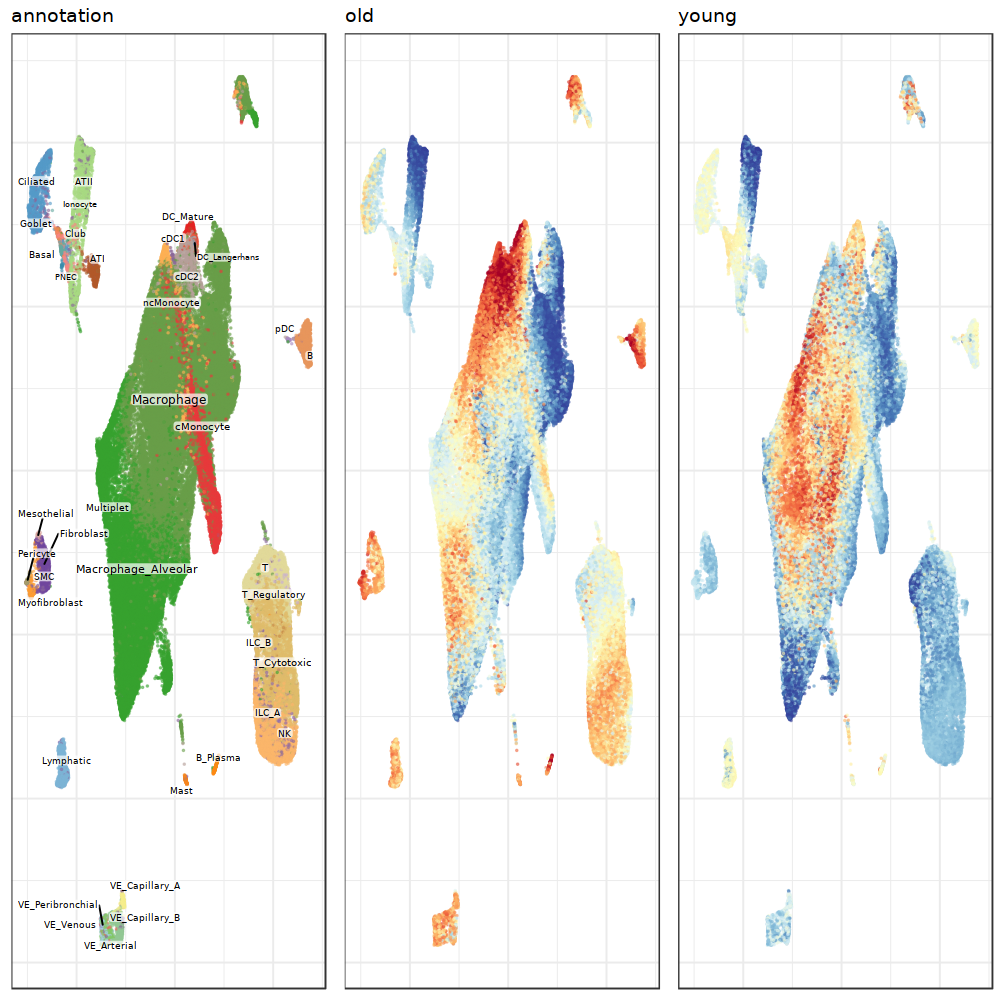

In [37]:

pl <- cao_obj$plotCellDensity(show.cell.groups=FALSE, name='cell.density.graph', size=size,
                          alpha=alpha, palette=brewerPalette("RdYlBu"))
plot_grid(p0, plotlist=pl, nrow=1)

In [38]:

ps <- lapply(c('permutation'), function(n) {
  cao_obj$plotDiffCellDensity(type=n, title=n, legend.position=c(0,0),
                          name='cell.density.graph', size=size, alpha=alpha,
                          gradient.range.quantile=0.975)
})

Warning message in mclapply(X, FUN, ..., mc.cores = mc.cores, mc.preschedule = mc.preschedule, :
“scheduled cores 3, 5, 6 did not deliver results, all values of the jobs will be affected”


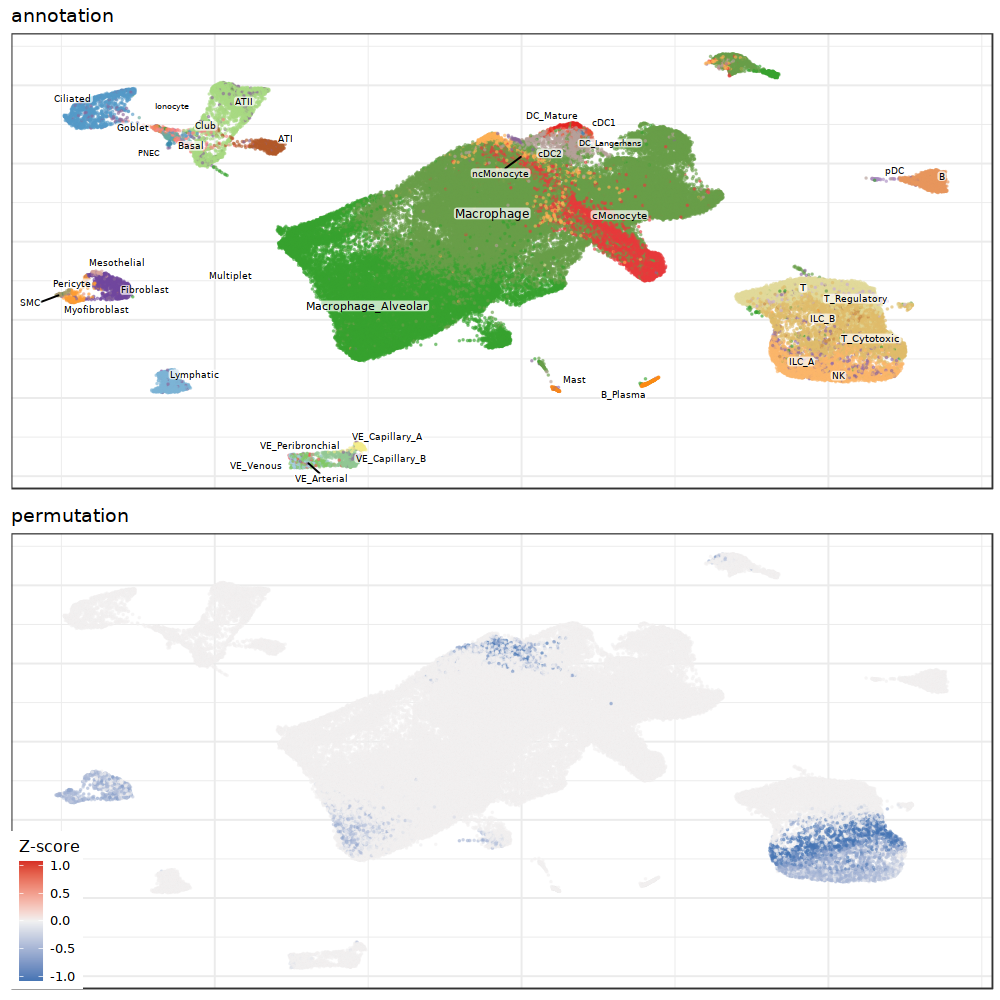

In [39]:
plot_grid(p0, plotlist=ps, nrow=2)

In [ ]:
lapply(c('sd', 'sample.frac'), function(n) {
  cao_obj$plotCellDensityVariation(type=n, title=n, name='cell.density.graph', size=size,
                               alpha=alpha, palette=brewerPalette("RdYlBu"),
                               legend.position=c(0, 0))
}) %>% plot_grid(plotlist=., ncol=2)

In [ ]:
plot_grid(
  cao_obj$plotCellGroupAbundanceVariation() + ggtitle("MAD, annotation"),
  cao_obj$plotCellGroupAbundanceVariation(type='sample.frac') + ggtitle("Missed sample frac, annotation"),
  rel_heights=c(1, 0.7)
)

In [ ]:
lapply(c('both', 'ref', 'target'), function(n) {
  cao_obj$plotCellDensityVariation(type='mad', condition=n, title=paste0('MAD: ', n), name='cell.density.graph',
                               size=size, alpha=alpha, palette=brewerPalette("RdYlBu"),
                               legend.position=c(0, 1))
}) %>% plot_grid(plotlist=., ncol=3)

In [ ]:
#cao_obj$plotVolcano(xlim=c(-3, 3), ylim=c(0, 3), lf.cutoff=1)

In [ ]:
#cao_obj$plotFilteredDEGenes(padj.cutoff = 0.05)

Cacluate Z Score and plot most changed genes across the entire dataset. 

In [22]:
exc.genes <- cao_obj$test.results$cluster.free.z %>%  colnames() %>%
  .[grepl("Mt-", ., ignore.case = TRUE)] %>% c("Malat1")


In [23]:
p1 <- cao_obj$plotMostChangedGenes(5, legend.position=c(0, 1), size=size, alpha=alpha,
                         excluded.genes=exc.genes, min.z=2.0, max.z=20, max.z.plot=5,
                         plot.na=FALSE)

## Apln(R) testing

Cluster Free Differntial expression of Apln and AplnR

In [ ]:
if (snakemake@config[["organism"]] == "mm") {
    cao_obj$plotGeneExpressionComparison(genes = c("Apln", "Aplnr", "Cd74"), nrow = 2)
} else {
    cao_obj$plotGeneExpressionComparison(genes = c("APLN", "APLNR", "CD74"), nrow = 2)
}


In [20]:
#cao_obj$estimateGenePrograms(n.programmes=10, n.sampled.cells=10000, cyc=1500)
#cao_obj$estimateClusterFreeExpressionShifts(n.top.genes=1500,n.permutations = 200)
#cao_obj$estimateClusterFreeDE(genes = c("Aplnr", "Apln"))

Estimating cluster-free Z-scores for 2 most expressed genes



0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
***************************************************


The following plots show gene program scores and cluster free expression shifts in the data. 

In [ ]:
cao_obj$plotGeneProgramScores(legend.position=c(0, 1), size=0.1, alpha=0.1)

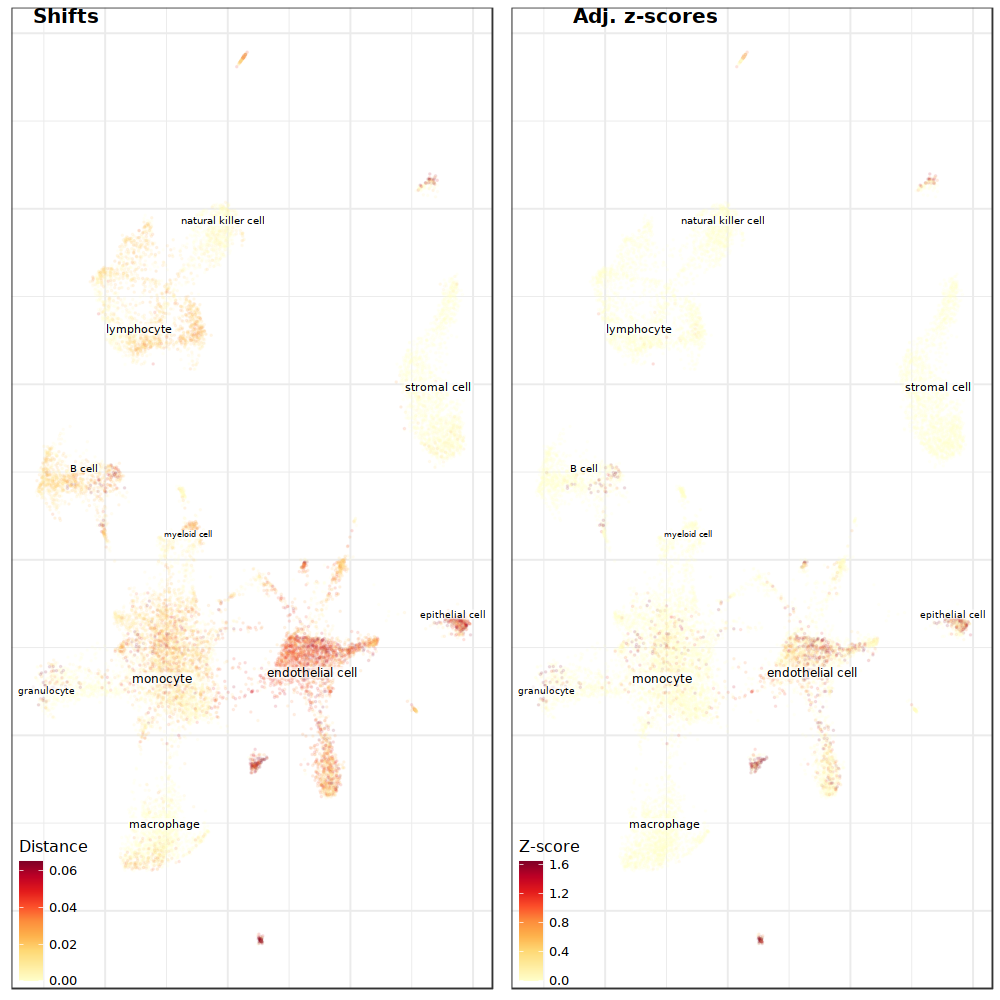

In [19]:
plot_grid(
  cao_obj$plotClusterFreeExpressionShifts(size=0.1, alpha=0.1, legend.position=c(0, 0), font.size=c(2,3))
)

In [ ]:
#cao_obj$plotGeneProgramGenes(program.id = 1)

## Differential Gene Expression Analysis

Here 4 Different Methods were used for DE nalysis:
- de: DESE2 with Bootstrapping 
- de.Fixed <- Fixed cell number (50), bootstrapped
- de.loo <- loo resampling method
- de.fix <- DESeq2 fix.count resampling

Plot differential expression using varios methods. 

In [14]:

create_DE_plots <- function(de_type, cao_obj) {
    p_list <- list()
    print(de_type)
   #p_list[["de_ncell"]] <-  cao_obj$plotNumberOfDEGenes(name = de_type) + ggtitle(de_type)
    p_list[["plot_volcano"]] <- cao_obj$plotVolcano(xlim=c(-3,3), ylim=c(0,3), lf.cutoff = 1, name = de_type)
    p_list[["nDEgenes"]] <- cao_obj$plotNumberOfDEGenes(name=de_type,pvalue.cutoff=1e-3, p.adjust=FALSE,
                        show.jitter=FALSE, type='box', show.resampling.results=TRUE)
    p_list[["stab"]] <- cao_obj$plotDEStabilityPerCellType(sort.order=T, name = paste0(de_type, "_stab.fix"))
    p_list
}
plots <- lapply(list("de.Wald","deFixed_LRT", "de.fix", "de.loo"), create_DE_plots, cao_obj = cao_obj )

[1] "de.Wald"


Warning message:
“Removed 29 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 15 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 17 rows containing missing values (geom_point).”
Warning message:
“Removed 15 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 243 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message in cao_obj$plotNumberOfDEGenes(name = de_type, pvalue.cutoff = 0.001, :
“Subtypes  are missed form sampling, ignoring those”


[1] "de.loo"


Warning message:
“Removed 29 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 15 rows containing missing values (geom_point).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 17 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 243 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message in cao_obj$plotNumberOfDEGenes(name = de_type, pvalue.cutoff = 0.001, :
“Subtypes  are mis

In [ ]:
plots